# Exploration des données de client

In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

from pyspark.sql.functions import col

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('..')

In [4]:
data_customers = spark.read.csv("../../input_data/Mall_Customers.csv", inferSchema=True, header=True)

In [5]:
data_customers.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



In [6]:
data_customers.show(10)
print('Total records in dataset',data_customers.count())

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
+----------+------+---+------------------+----------------------+
only showing top 10 rows

Total records in dataset 200


In [7]:
for c in data_customers.columns:
    data_customers.select(c).describe().show()
    print('Null rows of '+c,data_customers.where(col(c).isNull()).count())

+-------+------------------+
|summary|        CustomerID|
+-------+------------------+
|  count|               200|
|   mean|             100.5|
| stddev|57.879184513951124|
|    min|                 1|
|    max|               200|
+-------+------------------+

Null rows of CustomerID 0
+-------+------+
|summary|Gender|
+-------+------+
|  count|   200|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max|  Male|
+-------+------+

Null rows of Gender 0
+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              200|
|   mean|            38.85|
| stddev|13.96900733155888|
|    min|               18|
|    max|               70|
+-------+-----------------+

Null rows of Age 0
+-------+------------------+
|summary|Annual Income (k$)|
+-------+------------------+
|  count|               200|
|   mean|             60.56|
| stddev| 26.26472116527124|
|    min|                15|
|    max|               137|
+-------+------------------+

Nu

In [8]:
for c in data_customers.columns:
    if c in ('Age','Annual Income (k$)','Spending Score (1-100)'):
        print(c)
        quantile = data_customers.approxQuantile([c], [0.25, 0.5, 0.75], 0)
        quantile_25 = quantile[0][0]
        quantile_50 = quantile[0][1]
        quantile_75 = quantile[0][2]
        print('quantile_25: '+str(quantile_25))
        print('quantile_50: '+str(quantile_50))
        print('quantile_75: '+str(quantile_75))
        print('\n')

Age
quantile_25: 28.0
quantile_50: 36.0
quantile_75: 49.0


Annual Income (k$)
quantile_25: 40.0
quantile_50: 61.0
quantile_75: 78.0


Spending Score (1-100)
quantile_25: 34.0
quantile_50: 50.0
quantile_75: 73.0




In [9]:
cpt_gender = data_customers.groupBy('Gender').count()

In [10]:
cpt_gender.show()

+------+-----+
|Gender|count|
+------+-----+
|Female|  112|
|  Male|   88|
+------+-----+



In [11]:
cpt_age = data_customers.groupBy('Age').count()

In [12]:
cpt_age.show()

+---+-----+
|Age|count|
+---+-----+
| 31|    8|
| 65|    2|
| 53|    2|
| 34|    5|
| 28|    4|
| 27|    6|
| 26|    2|
| 44|    2|
| 22|    3|
| 47|    6|
| 52|    2|
| 20|    5|
| 40|    6|
| 57|    2|
| 54|    4|
| 48|    5|
| 19|    8|
| 64|    1|
| 41|    2|
| 43|    3|
+---+-----+
only showing top 20 rows



In [13]:
print(data_customers.cov('Age', 'Annual Income (k$)'))

-4.548743718593002


In [14]:
print(data_customers.cov('Age', 'Spending Score (1-100)'))

-118.0402010050252


In [15]:
print(data_customers.cov('Age', 'Spending Score (1-100)'))

-118.0402010050252


Pour les besoins de visualisation nous passons à un dataframe pandas afin d'utiliser les bibliothèques non distribuées

In [16]:
df_customers = data_customers.toPandas()

Text(0, 0.5, 'Count')

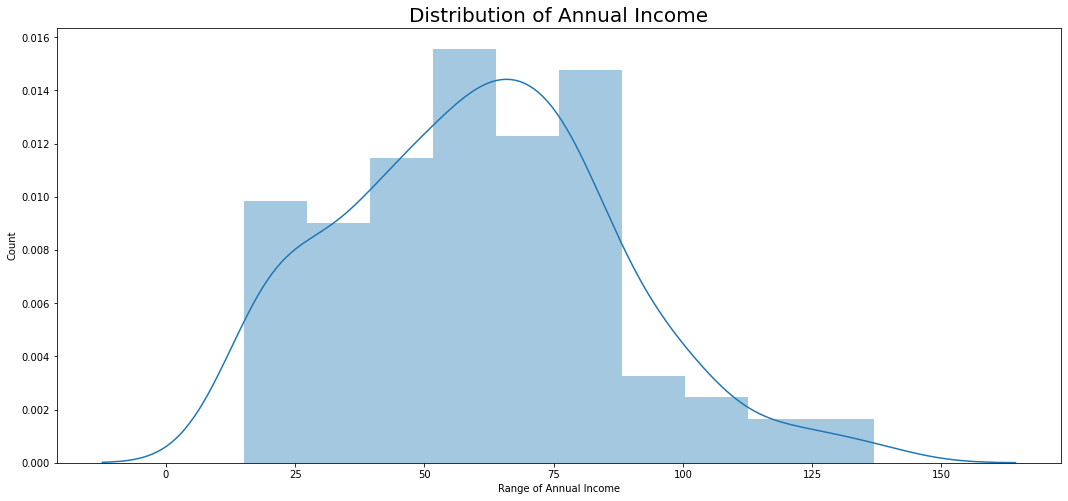

In [30]:
fig = sns.distplot(df_customers['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

**Observation:** peu de gens gagnent plus de 100k par an, la plus part des clients ont un salaire annuel entre 50-80k.
Le revenu annuel minimum est de 20k et le maximum 130k

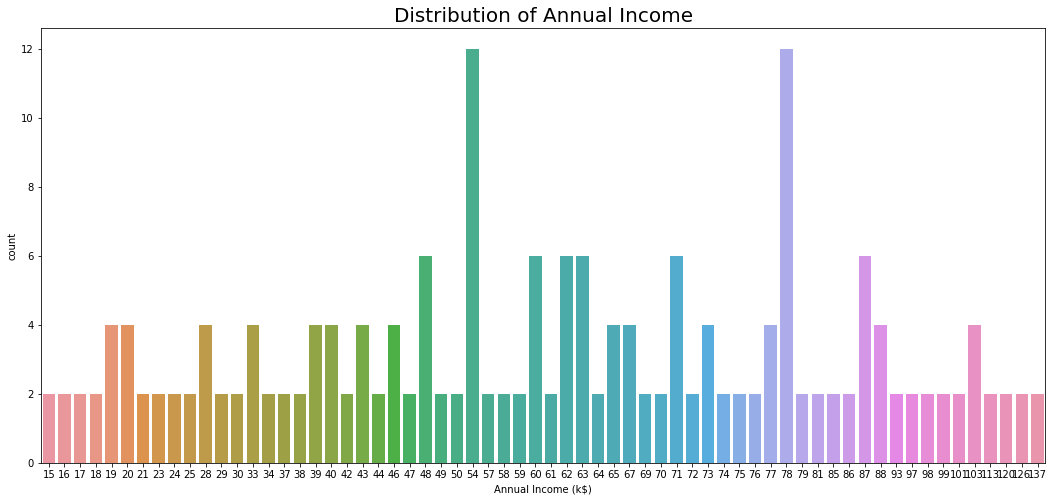

In [36]:
sns.countplot(df_customers['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

**Observation:** les clients avec un revenue annuel de 54 ou 78k dollars sont 3 fois plus fréquents que ceux avec un revenue de 19,20,28,46,65,88k dollars annuel

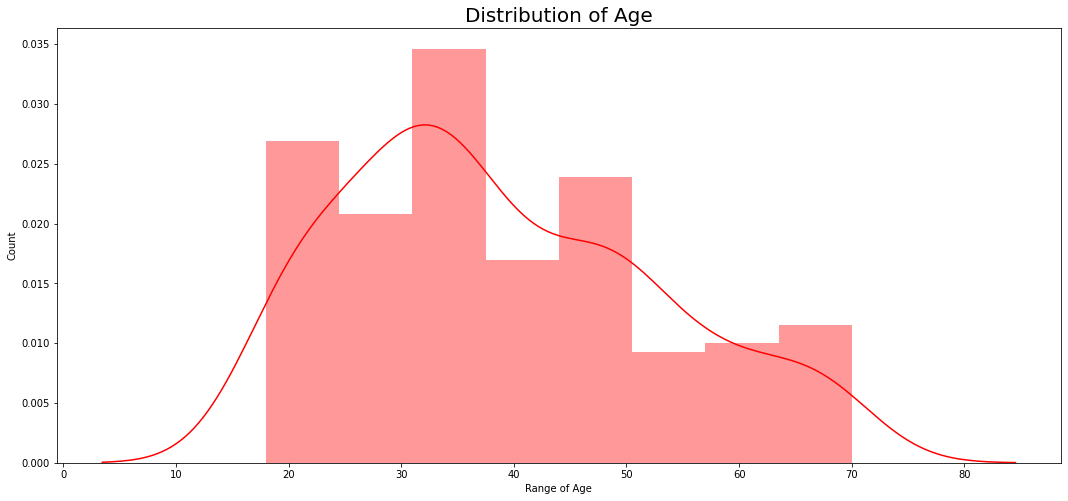

In [37]:
sns.distplot(df_customers['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

**Observation :** la plus part des clients ont entre 30-35 ans, la clientèle est plûtot jeune (la tranche d'âge 18-30 est plus importante que 40-70

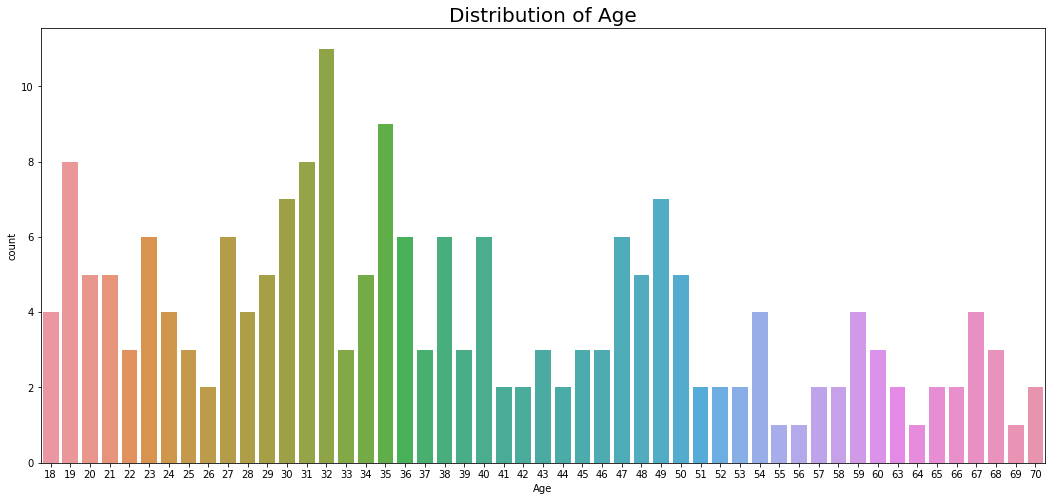

In [38]:
sns.countplot(df_customers['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.show()

**Observation:** plus précis que le graphique précedant les clients entre 27 à 39 ans sont les plus fréquents, ainsi que les 19, 35 et 49 ans.
Les clients de 55,56,64 et 69 sont les moins fréquents.
Les clients agés de 32 ans sont les plus fréquents.

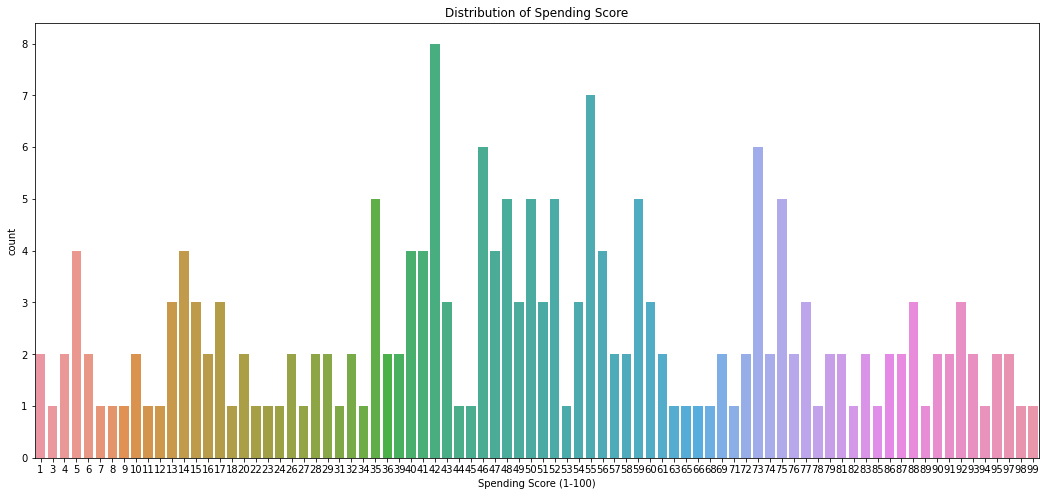

In [39]:
sns.countplot(df_customers['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.show()

**Observation:** la plus part des clients ont un Spending Score compris entre 36-60, 2 avec un spending score de 1, 8 de 42 et 1 de 99. Il y a une variété de client

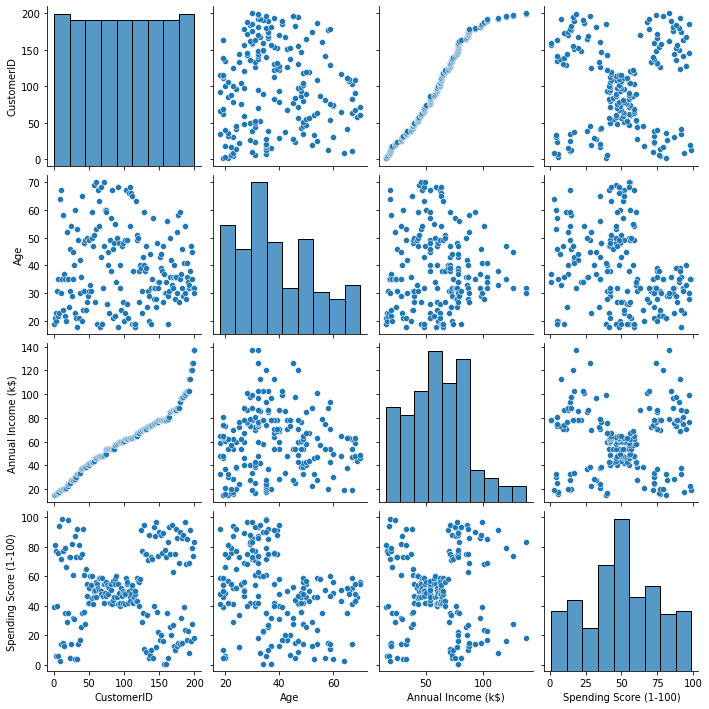

In [40]:
sns.pairplot(df_customers)
plt.show()

**Observation**: on ne remarque pas de corrélation forte entre les variables (on ne considère pas le CustomerID dans cette anaylse car défnies arbitrairement et ne peut servir à éxpliquer une variable)

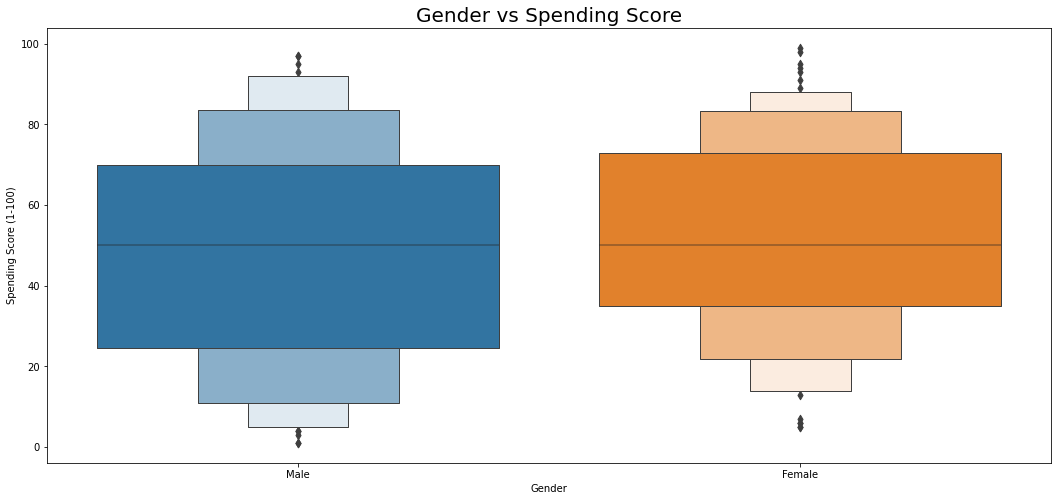

In [41]:
sns.boxenplot(df_customers['Gender'], df_customers['Spending Score (1-100)'])
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

**Observation:** l'analyse bi-variée entre le sexe du client et le Spending Score indique que le spending score des clients masculin est le fréquent entre 25 à 70. Alors que le spending score des clientes est plus élevé (entre 35 à 75). 

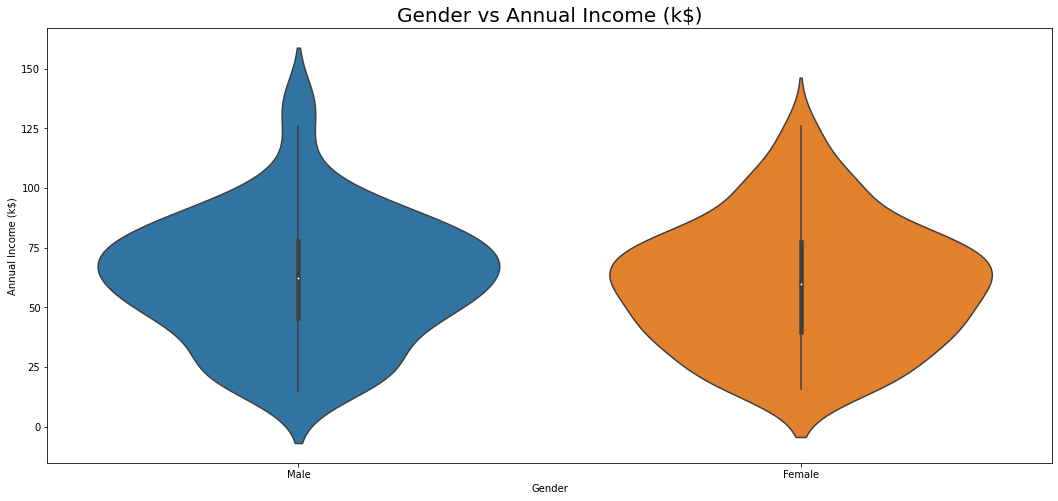

In [42]:
sns.violinplot(df_customers['Gender'], df_customers['Annual Income (k$)'])
plt.title('Gender vs Annual Income (k$)', fontsize = 20)
plt.show()

**Observation:** l'analyse bi-variée entre le sexe et les revenues annuels représenté ici par un violinplot indique le salaire des clients hommes est plus élevé que celui des femmes. Il y a plus d'hommes avec un salaire important que de femme mais les deux genres sont équivalent quand au salaire les plus bas.